# Data Transformation 
## by Kashish Gupta (Masters in Quantitative Economics, UCLA)

### This database contains information on cost of living in world's 5000 cities 
#### Data source: Numbeo's website

In [35]:
# import relevant packages 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from fitter import Fitter
import scipy.stats as stats
import statsmodels.formula.api as smf

In [145]:
# importing database

cost = pd.read_csv("cost-of-living_v2.csv")
cost.head()

,city,country,meal (mid),meal(McD),Beer,Cappuccino,Coke/Pepsi,Water,Milk,Bread,Apples,Potato,Cigarettes,Gasoline,Utility,Internet,Fitness Club,Primary School,Avg Salary,Interest Rate
0,Seoul,South Korea,53.78,6.15,3.07,3.93,1.48,0.79,2.20,2.85,6.77,3.84,3.46,1.43,182.13,22.48,55.88,17902.55,2689.62,3.47
1,Shanghai,China,39.86,5.69,1.14,3.98,0.53,0.33,2.74,2.61,2.26,0.84,3.56,1.20,66.00,17.07,63.49,26379.45,1419.87,5.03
2,Guangzhou,China,28.47,4.98,0.85,3.54,0.44,0.33,1.91,1.63,2.02,0.74,3.70,1.19,59.65,16.66,34.17,24556.21,1211.68,5.19
3,Mumbai,India,18.42,3.68,2.46,2.48,0.48,0.19,0.75,0.50,2.09,0.44,4.30,1.35,43.57,9.33,25.37,3682.67,640.81,7.96
4,Delhi,India,22.11,4.30,1.84,1.77,0.49,0.19,0.73,0.50,1.79,0.37,4.30,1.24,58.07,7.95,21.20,1964.24,586.46,8.06


# treating nulls

In [3]:
# description of variables and nulls 

print (cost.info())
print (cost.describe())

## there exists null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            4956 non-null   object 
 1   country         4956 non-null   object 
 2   meal (mid)      4505 non-null   float64
 3   meal(McD)       4622 non-null   float64
 4   Beer            4460 non-null   float64
 5   Cappuccino      4612 non-null   float64
 6   Coke/Pepsi      4511 non-null   float64
 7   Water           4640 non-null   float64
 8   Milk            4578 non-null   float64
 9   Bread           4543 non-null   float64
 10  Apples          4584 non-null   float64
 11  Potato          4519 non-null   float64
 12  Cigarettes      4466 non-null   float64
 13  Gasoline        4368 non-null   float64
 14  Utility         4468 non-null   float64
 15  Internet        4607 non-null   float64
 16  Fitness Club    3581 non-null   float64
 17  Primary School  3275 non-null   f

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


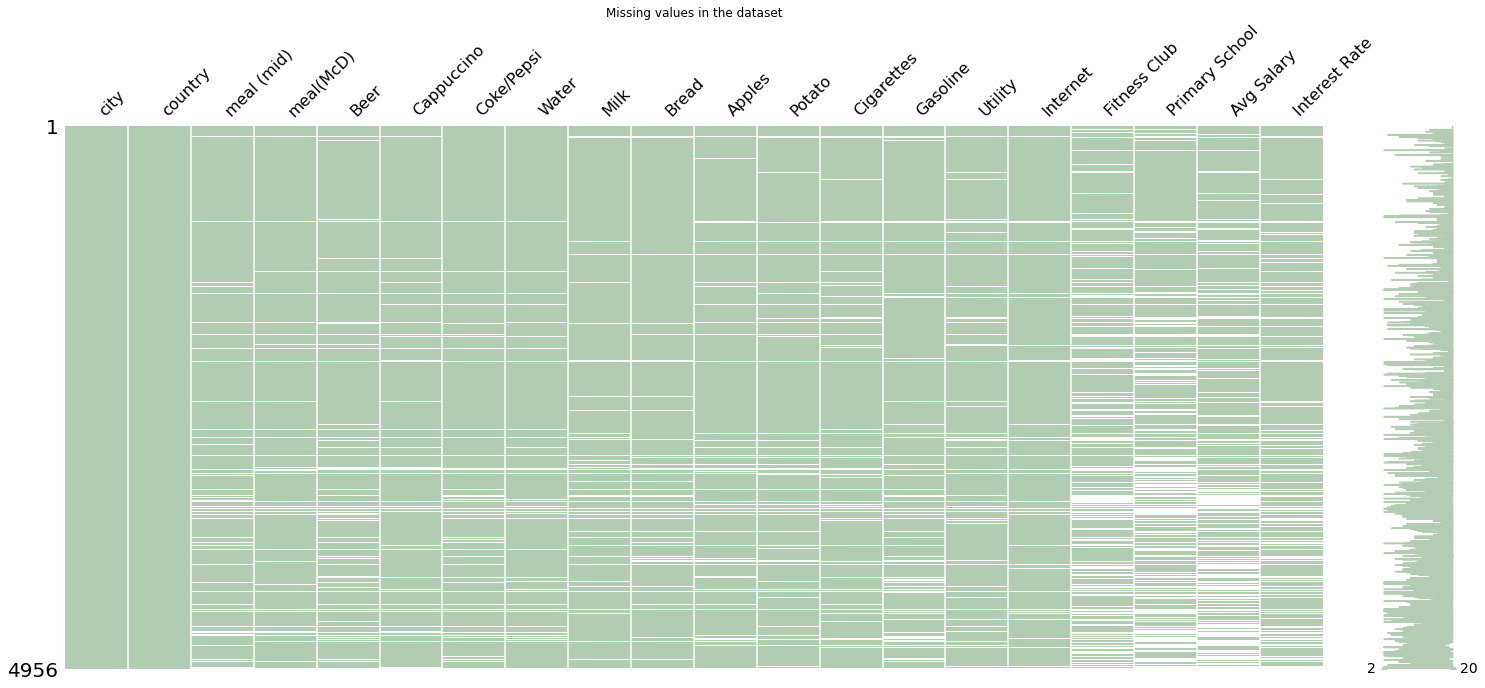

In [31]:
# visualize null values 

import missingno as msno
msno.matrix(cost.iloc[:,:],color = (0.7, 0.8, 0.7))
plt.title("Missing values in the dataset")
plt.show()

# the white lines show the presence of missing observations 

In [5]:
# treating null values 

for i in cost.columns[2:]:        # filling nulls with column average 
    mean_value=cost[i].mean()
    cost[i].fillna(value=mean_value, inplace=True)
    
cost.isnull().sum()               # checking count of null values, now we have 0 nulls 

city              0
country           0
meal (mid)        0
meal(McD)         0
Beer              0
Cappuccino        0
Coke/Pepsi        0
Water             0
Milk              0
Bread             0
Apples            0
Potato            0
Cigarettes        0
Gasoline          0
Utility           0
Internet          0
Fitness Club      0
Primary School    0
Avg Salary        0
Interest Rate     0
dtype: int64

In [6]:
# group the data by countries 

cost_new = cost.groupby(['country']).mean().reset_index()           # take the average of all cities 
cost_new

,country,meal (mid),meal(McD),Beer,Cappuccino,Coke/Pepsi,Water,Milk,Bread,Apples,Potato,Cigarettes,Gasoline,Utility,Internet,Fitness Club,Primary School,Avg Salary,Interest Rate
0,Afghanistan,19.032604,4.294899,3.193145,1.316651,0.726291,0.466601,0.618092,0.699285,1.003232,0.544413,3.008418,0.888611,105.584722,262.207790,24.199997,4803.511291,1006.324819,8.855682
1,Albania,25.532000,4.223333,1.378667,1.198667,1.148667,0.604000,1.136667,0.592000,0.943333,0.646667,2.871333,1.752000,81.174667,24.855558,29.594665,3891.294244,659.225261,5.208273
2,Algeria,15.711636,3.071159,1.880829,0.771759,0.519526,0.225877,0.687310,0.313193,2.149100,0.554308,2.354427,0.331225,50.590833,47.055297,16.579411,5378.305016,491.864457,6.453899
3,American Samoa,6.660000,22.130000,1.910000,1.000000,1.190000,2.110000,1.050000,3.160000,2.110000,1.566477,6.285253,1.361664,136.254584,81.140000,36.849994,8770.865915,1821.186305,6.518030
4,Andorra,40.920000,7.010000,2.073333,1.380000,1.713333,1.370000,0.950000,1.090000,2.546667,1.043333,5.883333,1.756667,75.010000,36.996667,54.266667,8727.480610,2842.183333,2.843333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Venezuela,34.529080,8.905539,1.549987,1.974720,1.132993,0.817211,1.508333,1.613651,4.022609,1.337550,3.993098,0.501111,24.088032,50.847965,32.749443,9005.529170,1097.610170,20.519125
211,Vietnam,23.366250,5.130851,1.407089,1.892372,0.677881,0.440915,1.319386,1.029320,2.542799,1.199497,1.866465,1.001587,81.229405,22.971749,29.445712,10447.815888,1033.757940,9.935245
212,Yemen,34.151116,10.554242,2.742760,2.601415,1.585392,0.725686,1.969587,1.173265,5.839913,2.042354,4.535787,2.056190,89.261310,85.210963,49.954282,4171.595976,1426.430218,10.150584
213,Zambia,29.079062,4.781299,1.788507,2.031415,1.022535,0.647087,1.219587,1.172244,2.622683,1.570422,3.568644,1.360713,138.789107,121.990015,34.988567,11794.022535,1617.722547,17.650584


In [67]:
# drop Fitness Club and Primary School
cost_new = cost_new.drop(columns='Fitness Club') 
#removed due to '0' values

In [68]:
cost_new = cost_new.drop(columns='Primary School') 

# treating non-linearities

meal (mid)
Lambda value used for transformation of: 0.008081954502983157
meal(McD)
Lambda value used for transformation of: 0.089506943949454
Beer
Lambda value used for transformation of: -0.06451598098335899
Cappuccino
Lambda value used for transformation of: 0.2246466460222283
Coke/Pepsi
Lambda value used for transformation of: 0.08706380610442434
Water
Lambda value used for transformation of: 0.14274830689528425
Milk
Lambda value used for transformation of: -0.1963072482289994
Bread
Lambda value used for transformation of: 0.16243246862947736
Apples
Lambda value used for transformation of: -0.10529149241274915
Potato
Lambda value used for transformation of: -0.059756494730883014
Cigarettes
Lambda value used for transformation of: -0.12625003488639533
Gasoline
Lambda value used for transformation of: 0.5310522340751106
Utility
Lambda value used for transformation of: 0.16982529256893802
Internet
Lambda value used for transformation of: -0.2521511972414584
Avg Salary
Lambda value used

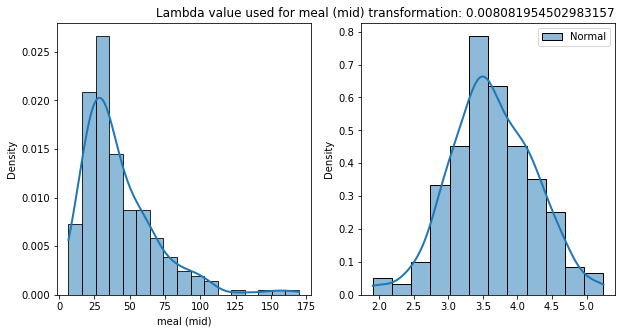

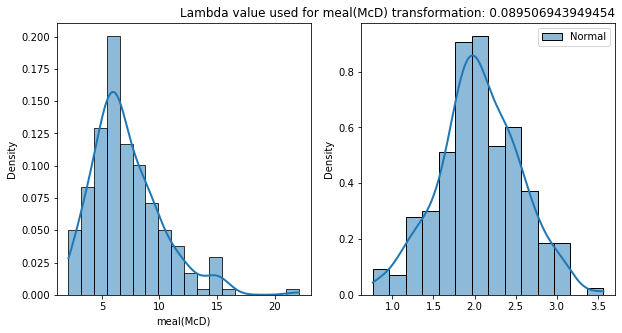

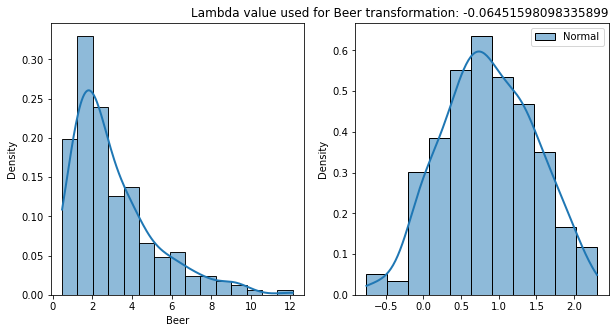

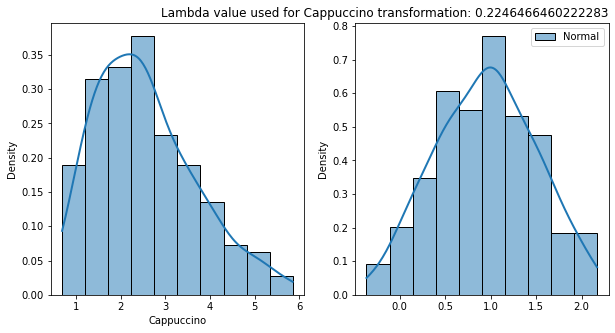

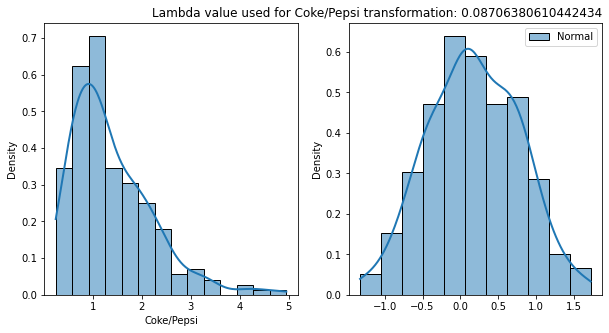

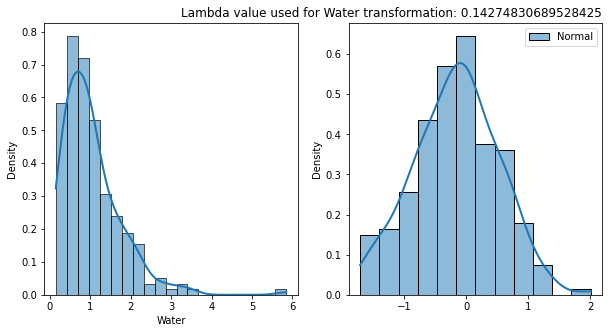

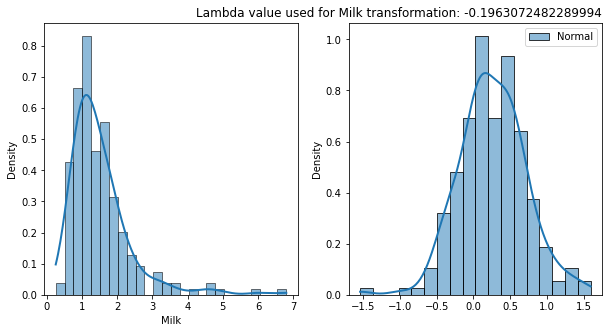

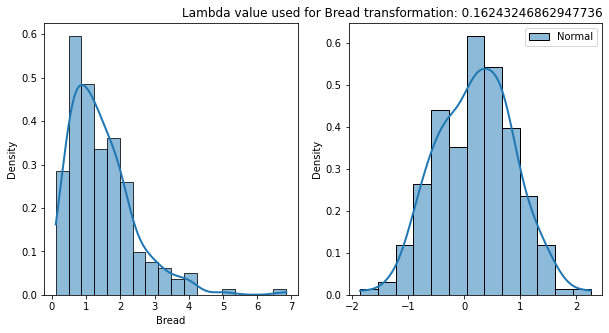

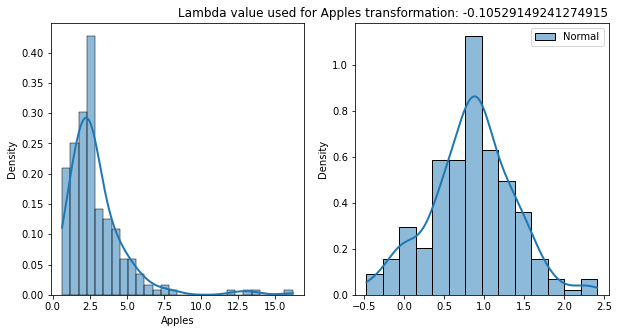

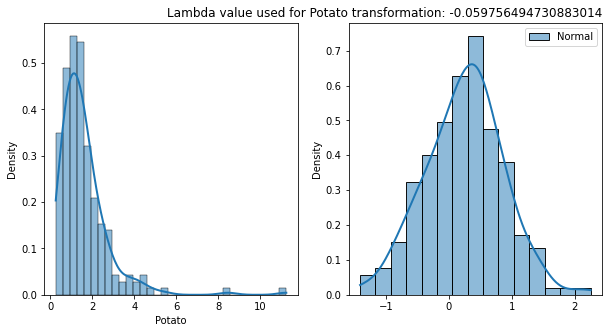

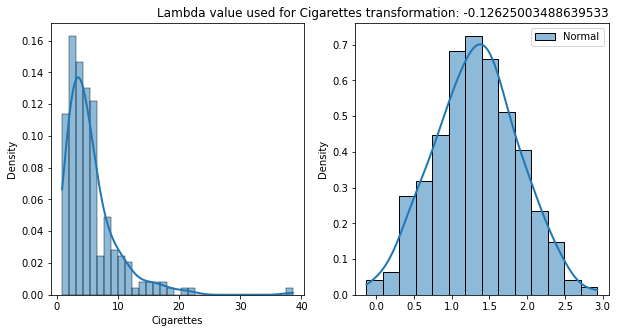

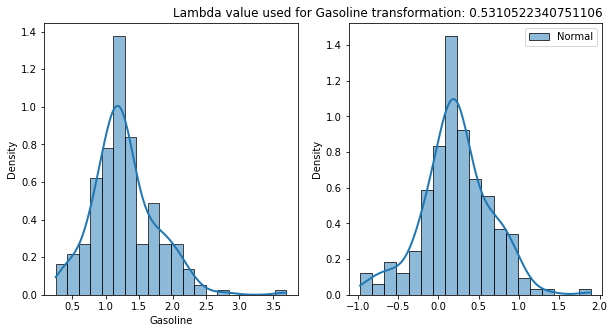

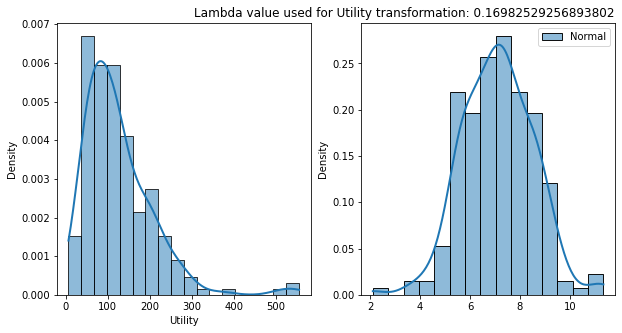

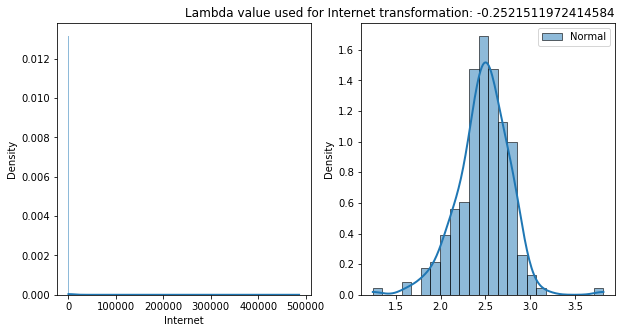

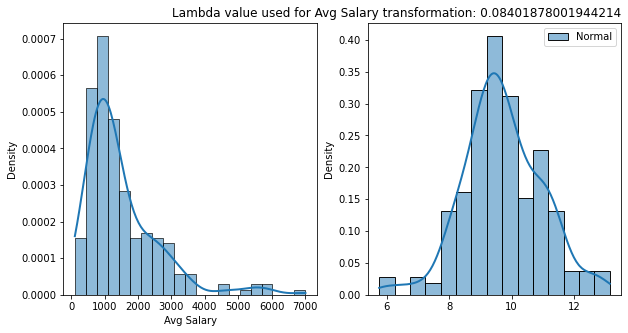

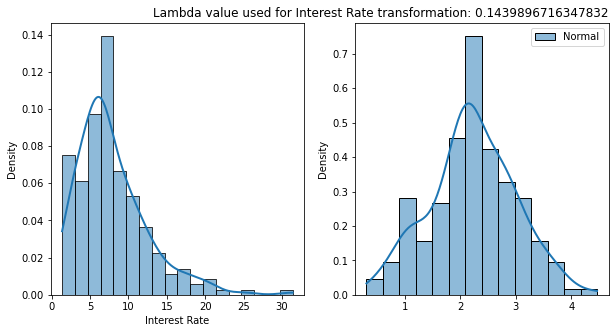

In [70]:
# non linearities
# on plotting histograms, quantiles and correlation plot there exists non-linearities among variables and hence we ned to transform them 

# using power log transformation


fitlambdal = []


for i in cost_new.columns[1:]:
    print(i)
    origdata = cost_new[i]
    # transform data and save lambda value
    fitdata, fitlambda = stats.boxcox(origdata)
    
    
    fitlambdal.append(fitlambda)

    fig, ax = plt.subplots(1, 2)
    sns.histplot(origdata, kde = True, line_kws = {'linewidth': 2}, stat = "density",
                 label = "Non-Normal", ax = ax[0])


    sns.histplot(fitdata, kde = True, line_kws = {'linewidth': 2}, stat = "density", legend=True,
                 label = "Normal", ax = ax[1])

    # adding legends
    plt.legend(loc = "upper right")
    plt.title(f"Lambda value used for {i} transformation: {fitlambda}",loc="right")

    # rescaling
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for transformation of: {fitlambda}")

In [71]:
cost_1=pd.DataFrame()

for i in cost_new.columns[1:]:
    fitdata, fitlambda = stats.boxcox(cost_new[i])
    col_name = 't' + str(i)
    cost_1[col_name] = fitdata

In [74]:
new_col = cost_new['country']
idx = 0
cost_1.insert(loc=idx, column='country', value=new_col)

ValueError: cannot insert country, already exists

In [75]:
cost_1

,country,tmeal (mid),tmeal(McD),tBeer,tCappuccino,tCoke/Pepsi,tWater,tMilk,tBread,tApples,tPotato,tCigarettes,tGasoline,tUtility,tInternet,tAvg Salary,tInterest Rate
0,Afghanistan,2.981509,1.556761,1.118590,0.283769,-0.315393,-0.722271,-0.504570,-0.347504,0.003226,-0.619229,1.028266,-0.114469,7.103005,2.992064,9.374881,2.562393
1,Albania,3.282724,1.537630,0.317813,0.184949,0.139441,-0.486465,0.126503,-0.502548,-0.058515,-0.441652,0.987563,0.653196,6.535712,2.201945,8.631987,1.862811
2,Algeria,2.785288,1.180334,0.619013,-0.251687,-0.636522,-1.340398,-0.389115,-1.058042,0.735046,-0.600560,0.811635,-0.835869,5.577073,2.464155,8.132892,2.139006
3,American Samoa,1.910722,3.568733,0.633781,0.000000,0.175277,0.787934,0.048557,1.265110,0.718090,0.442864,1.640492,0.335454,7.677990,2.656924,10.462164,2.151949
4,Andorra,3.767849,2.127354,0.712273,0.334022,0.551261,0.321991,-0.051552,0.086784,0.890255,0.042367,1.587877,0.656782,6.370179,2.370271,11.314320,1.127690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Venezuela,3.592980,2.415336,0.432109,0.735184,0.125544,-0.198977,0.394862,0.497586,1.294737,0.288327,1.270308,-0.578350,4.219531,2.493223,9.530672,3.785212
211,Vietnam,3.191765,1.761006,0.337788,0.685790,-0.382278,-0.772851,0.269761,0.028966,0.888878,0.180917,0.600096,0.001586,6.537135,2.166539,9.423016,2.721175
212,Yemen,3.581655,2.623489,0.976827,1.066486,0.470201,-0.313410,0.634663,0.161882,1.610465,0.699081,1.376447,0.878259,6.737706,2.672983,10.007775,2.751066
213,Zambia,3.416331,1.679583,0.570613,0.768270,0.022307,-0.422028,0.194694,0.160989,0.916869,0.445312,1.175277,0.334631,7.720519,2.784820,10.240663,3.555052


In [119]:
cost_1.to_csv('cost_1.csv')

# treating outliers

#### using the regression model: Average Salary ~ meal (mcd) + milk + potato + cigarettes + gasoline + utlity 

In [83]:
cost_1['salary'] = cost_1['tAvg Salary']

In [84]:
reg = smf.ols(formula = 'salary ~  tMilk + tPotato + tCigarettes + tGasoline + tUtility', data = cost_1).fit()

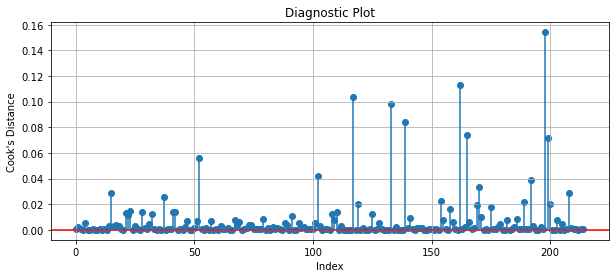

In [87]:
 # cook's distance 

cooks_distance = reg.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(cost_1.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = cost_1.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

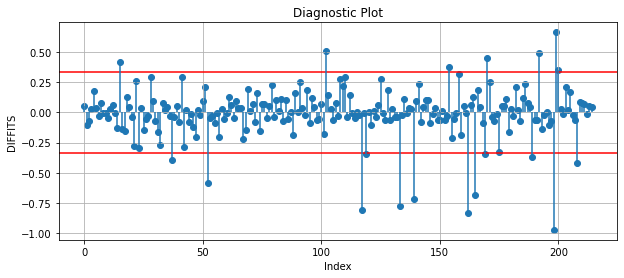

In [88]:
# dffits

dffits, threshold = reg.get_influence().dffits
plt.figure(figsize = (10, 4))
plt.scatter(cost_1.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = cost_1.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

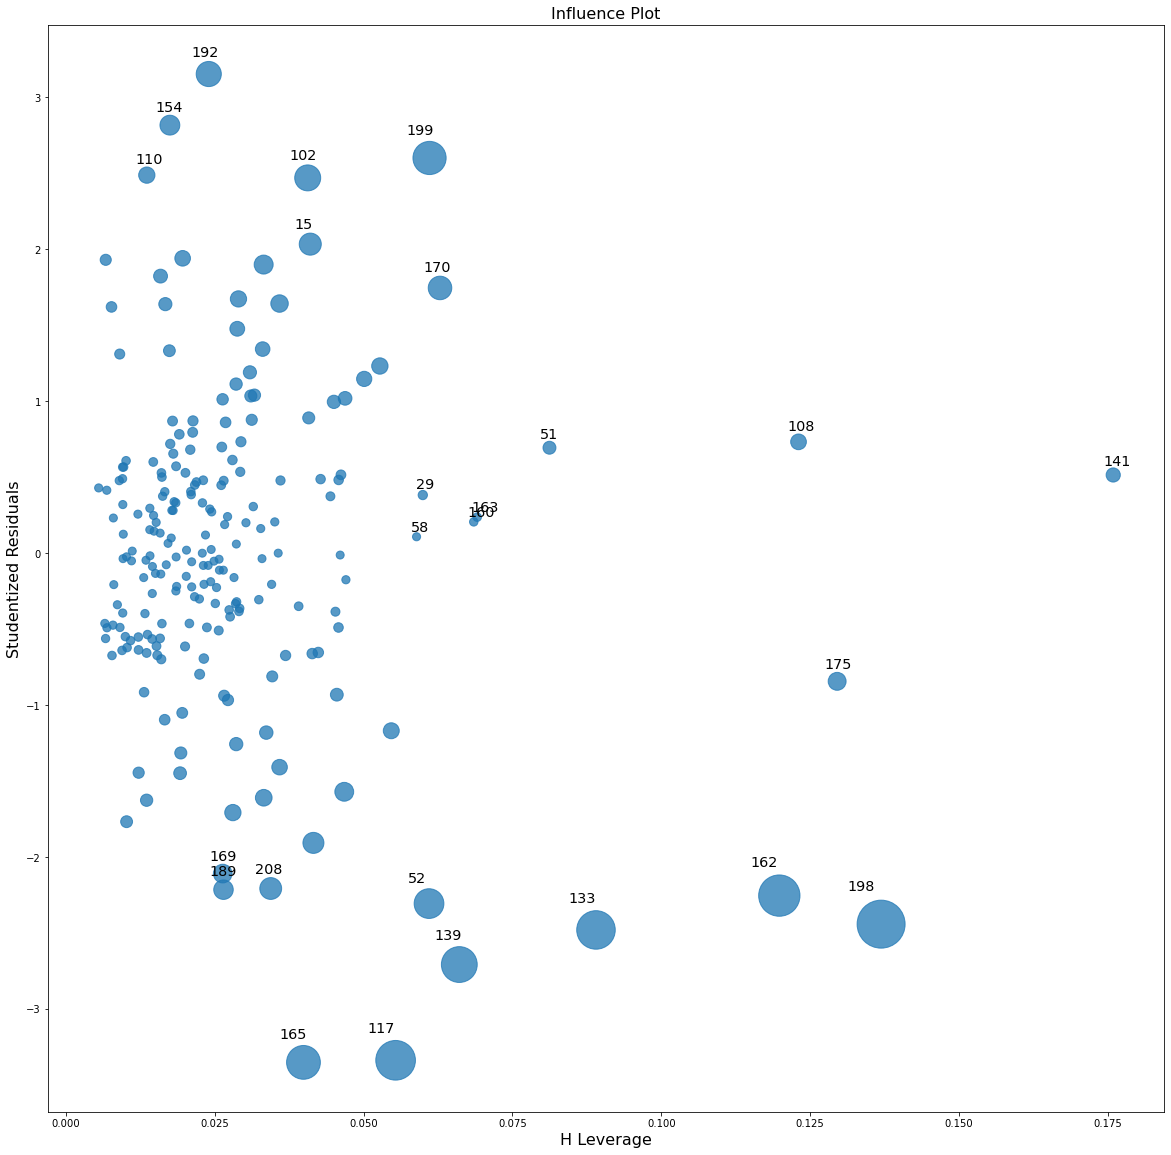

In [117]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(reg,ax = ax)

In [146]:
# treating outliers using inlfuence plot 
# get a description of influence and outliers 

influence = reg.get_influence()
pd.Series(influence.hat_matrix_diag).describe()

count    215.000000
mean       0.027907
std        0.022460
min        0.005482
25%        0.015170
50%        0.022915
75%        0.032550
max        0.175935
dtype: float64

In [149]:
# obtain studentized residuals, Cook’s Distances, DFFITS

influence = reg.get_influence()
inf_sum = influence.summary_frame()

inf_sum.head()

# the table shows the cooks distance, standardised residuals, hat values, dffits, studentized residuals for each observation 

,dfb_Intercept,dfb_tMilk,dfb_tPotato,dfb_tCigarettes,dfb_tGasoline,dfb_tUtility,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.008521,-0.025257,-0.009710,-0.001602,-0.013870,0.018091,0.000429,0.331357,0.022915,0.050744,0.330650,0.050636
1,-0.030137,-0.025170,0.055278,0.020968,-0.074890,0.014840,0.001907,-0.694940,0.023149,-0.106979,-0.694078,-0.106846
2,-0.007943,0.018578,0.003883,-0.008516,0.051993,-0.000056,0.000832,-0.350358,0.039081,-0.070657,-0.349621,-0.070508
3,-0.003067,-0.018307,0.011341,0.005748,-0.000720,0.004827,0.000165,0.320480,0.009537,0.031447,0.319791,0.031379
4,0.075239,-0.041163,-0.016196,0.048500,0.105203,-0.084063,0.005211,1.330222,0.017363,0.176826,1.332690,0.177154




Leverage vs. Studentized Residuals


Text(0, 0.5, 'Studentized Residuals')

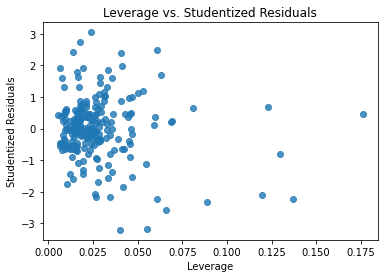

In [150]:
# plot of leverage vs studentized residuals which shows the presence of influential points (both high x and y values)

student_resid = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag


print ('\n')
print ('Leverage vs. Studentized Residuals')
sns.regplot(leverage, reg.resid_pearson,  fit_reg=False)
plt.title('Leverage vs. Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')

In [151]:
# Joining salary with the resulting residual table

from statsmodels.formula.api import ols

regres = pd.concat([cost_1.salary, inf_sum], axis = 1)
regres=regres.rename(columns={'hat_diag': 'leverage'})       # renaming column name from hat_diag to leverage
regres.head()

,salary,dfb_Intercept,dfb_tMilk,dfb_tPotato,dfb_tCigarettes,dfb_tGasoline,dfb_tUtility,cooks_d,standard_resid,leverage,dffits_internal,student_resid,dffits
0,9.374881,-0.008521,-0.025257,-0.009710,-0.001602,-0.013870,0.018091,0.000429,0.331357,0.022915,0.050744,0.330650,0.050636
1,8.631987,-0.030137,-0.025170,0.055278,0.020968,-0.074890,0.014840,0.001907,-0.694940,0.023149,-0.106979,-0.694078,-0.106846
2,8.132892,-0.007943,0.018578,0.003883,-0.008516,0.051993,-0.000056,0.000832,-0.350358,0.039081,-0.070657,-0.349621,-0.070508
3,10.462164,-0.003067,-0.018307,0.011341,0.005748,-0.000720,0.004827,0.000165,0.320480,0.009537,0.031447,0.319791,0.031379
4,11.314320,0.075239,-0.041163,-0.016196,0.048500,0.105203,-0.084063,0.005211,1.330222,0.017363,0.176826,1.332690,0.177154


In [154]:
# using studentized resiuals to identify outliers
# benchmark: remove if absolute value is greater than 2 

print (regres.salary[abs(r) > 2])

15     11.686406
52      8.118550
102    11.032909
110    13.145263
117     5.758251
133     8.503079
139     6.761485
154    12.624445
162     8.337304
165     6.033428
169     8.462845
189     6.208817
192    11.723992
198     9.349779
199    12.730277
208     8.679676
Name: salary, dtype: float64


In [156]:
# we need to see which observations can be considered to have leverage values
# the leverage cutoff can be calculated as (2k+2)/n where k is the number of predictors and n is the sample size

# point with leverage = (2k+2)/n where k = 5 and n = 215
k = 5 
n = 215
lev = ((2*k+2)/n)
print (lev)

# Print all salary values where the leverage exceeds the threshold 

print (regres.salary[abs(l) > lev])

0.05581395348837209
29     10.255715
51      9.646648
52      8.118550
58      9.467979
108    10.711532
133     8.503079
139     6.761485
141    11.419970
160    10.462164
162     8.337304
163    10.462164
170    10.154850
175     8.781941
198     9.349779
199    12.730277
Name: salary, dtype: float64


In [161]:
# now we have identified both outliers using studentized resiuals and leverage 
# combining outliers and leverage we can now identify influential observations 

#large residual and large leverage = INFLUENTIAL

outlier=pd.DataFrame((regres.salary[abs(r) > 2]))
lever= pd.DataFrame((regres.salary[abs(l) > lev]))

Influential2=pd.merge(outlier,lever, left_index=True, right_index=True)
print(Influential2)

      salary_x   salary_y
52    8.118550   8.118550
133   8.503079   8.503079
139   6.761485   6.761485
162   8.337304   8.337304
198   9.349779   9.349779
199  12.730277  12.730277


In [164]:
# remove these observations from the main database

cost_2=cost_1.drop([52,133,139,162,198,199])
cost_2

,country,tmeal (mid),tmeal(McD),tBeer,tCappuccino,tCoke/Pepsi,tWater,tMilk,tBread,tApples,tPotato,tCigarettes,tGasoline,tUtility,tInternet,tAvg Salary,tInterest Rate,salary
0,Afghanistan,2.981509,1.556761,1.118590,0.283769,-0.315393,-0.722271,-0.504570,-0.347504,0.003226,-0.619229,1.028266,-0.114469,7.103005,2.992064,9.374881,2.562393,9.374881
1,Albania,3.282724,1.537630,0.317813,0.184949,0.139441,-0.486465,0.126503,-0.502548,-0.058515,-0.441652,0.987563,0.653196,6.535712,2.201945,8.631987,1.862811,8.631987
2,Algeria,2.785288,1.180334,0.619013,-0.251687,-0.636522,-1.340398,-0.389115,-1.058042,0.735046,-0.600560,0.811635,-0.835869,5.577073,2.464155,8.132892,2.139006,8.132892
3,American Samoa,1.910722,3.568733,0.633781,0.000000,0.175277,0.787934,0.048557,1.265110,0.718090,0.442864,1.640492,0.335454,7.677990,2.656924,10.462164,2.151949,10.462164
4,Andorra,3.767849,2.127354,0.712273,0.334022,0.551261,0.321991,-0.051552,0.086784,0.890255,0.042367,1.587877,0.656782,6.370179,2.370271,11.314320,1.127690,11.314320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Venezuela,3.592980,2.415336,0.432109,0.735184,0.125544,-0.198977,0.394862,0.497586,1.294737,0.288327,1.270308,-0.578350,4.219531,2.493223,9.530672,3.785212,9.530672
211,Vietnam,3.191765,1.761006,0.337788,0.685790,-0.382278,-0.772851,0.269761,0.028966,0.888878,0.180917,0.600096,0.001586,6.537135,2.166539,9.423016,2.721175,9.423016
212,Yemen,3.581655,2.623489,0.976827,1.066486,0.470201,-0.313410,0.634663,0.161882,1.610465,0.699081,1.376447,0.878259,6.737706,2.672983,10.007775,2.751066,10.007775
213,Zambia,3.416331,1.679583,0.570613,0.768270,0.022307,-0.422028,0.194694,0.160989,0.916869,0.445312,1.175277,0.334631,7.720519,2.784820,10.240663,3.555052,10.240663


In [165]:
# rerun regression without influetial points now 

reg1 = smf.ols(formula = 'salary ~  tMilk + tPotato + tCigarettes + tGasoline + tUtility', data = cost_2).fit()

In [167]:
# compare the summary statistics of both the models 
print(reg.summary())
print(reg1.summary())

# observation: clearly on removing the observations, the Rsquared has improved and AIC/BIC has fallen which is a good sign

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     27.24
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.50e-21
Time:                        10:44:38   Log-Likelihood:                -299.03
No. Observations:                 215   AIC:                             610.1
Df Residuals:                     209   BIC:                             630.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.6855      0.382     20.111      